In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

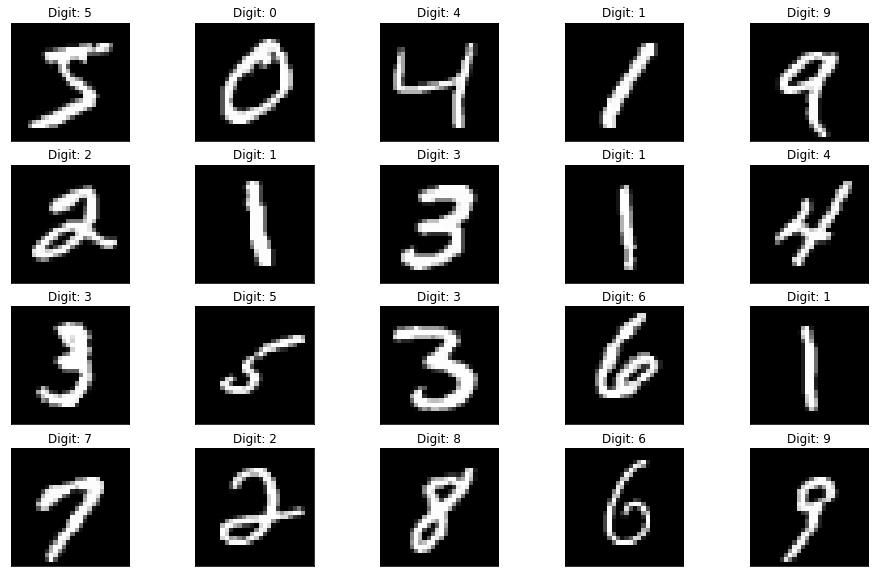

In [6]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)   
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [8]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [10]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2406 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0778 - accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0274 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0141 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 40s 21m

1/1 [==============================] - 0s 21ms/step


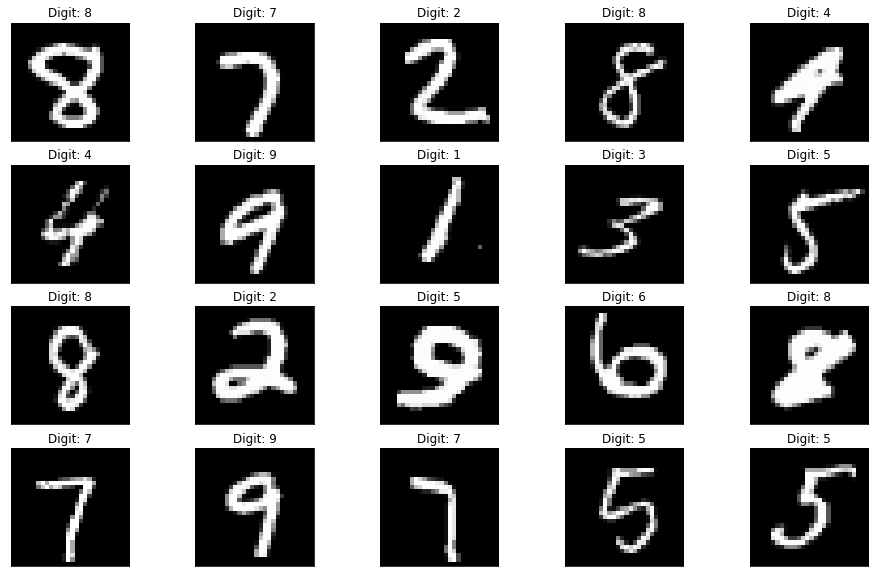

In [12]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [13]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 3s 9ms/step


0.9862

In [19]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is", end=" ")
for n in predicted_value:
  print(np.argmax(n), end=" ")

313/313 [==============================] - 3s 9ms/step
Handwritten number in the image is 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 5 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 2 4 2 4 1 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0 2 6 6 4 9 5 3 3 2 3 9 

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1])

Test loss: 0.04456733539700508
Test accuracy: 0.9861999750137329
